In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


folder_dir ='train'
data = []
label = []

SIZE =  128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("png") or file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue
data_arr = np.array(data)
label_arr = np.array(label)

encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,num_classes=2)
X = data_arr/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [2]:
len(label_arr)

6591

In [3]:
np.unique(label_arr)

array(['Benign', 'Malignant'], dtype='<U9')

In [4]:
np.unique(y)

array([0., 1.], dtype=float32)

In [5]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                   

In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [8]:
from tensorflow.keras.optimizers import Adam

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
import tensorflow as tf

# Replace tf.executing_eagerly_outside_functions with tf.compat.v1.executing_eagerly_outside_functions
tf.compat.v1.executing_eagerly_outside_functions()

True

In [10]:
batch_size=32
epochs=10
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\Users\Revanth teja\AppData\Local\Temp\ipykernel_16436\1350589163.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/10

165/165 [==============================] - 250s 2s/step - loss: 0.4627 - accuracy: 0.8393 - val_loss: 0.4458 - val_accuracy: 0.8408
Epoch 2/10
165/165 [==============================] - 259s 2s/step - loss: 0.4375 - accuracy: 0.8426 - val_loss: 0.4168 - val_accuracy: 0.8408
Epoch 3/10
165/165 [==============================] - 252s 2s/step - loss: 0.4383 - accuracy: 0.8426 - val_loss: 0.4038 - val_accuracy: 0.8408
Epoch 4/10
165/165 [==============================] - 263s 2s/step - loss: 0.4095 - accuracy: 0.8431 - val_loss: 0.3782 - val_accuracy: 0.8415
Epoch 5/10
165/165 [==============================] - 246s 1s/step - loss: 0.3657 - accuracy: 0.8678 - val_loss: 0.3099 - val_accuracy: 0.8886
Epoch 6/10
165/165 [==============================] - 234s 1s/step - loss: 0.3116 - accuracy: 0.8854 - val_loss: 0.2937 - val_accuracy: 0.8939
Epoch 7/10
165/165 [==============================] - 234s 1s/step - loss: 0.2989 - accuracy: 0.8875 - val_loss: 0.3722 - val_accuracy: 0.840

42/42 [==============================] - 12s 278ms/step


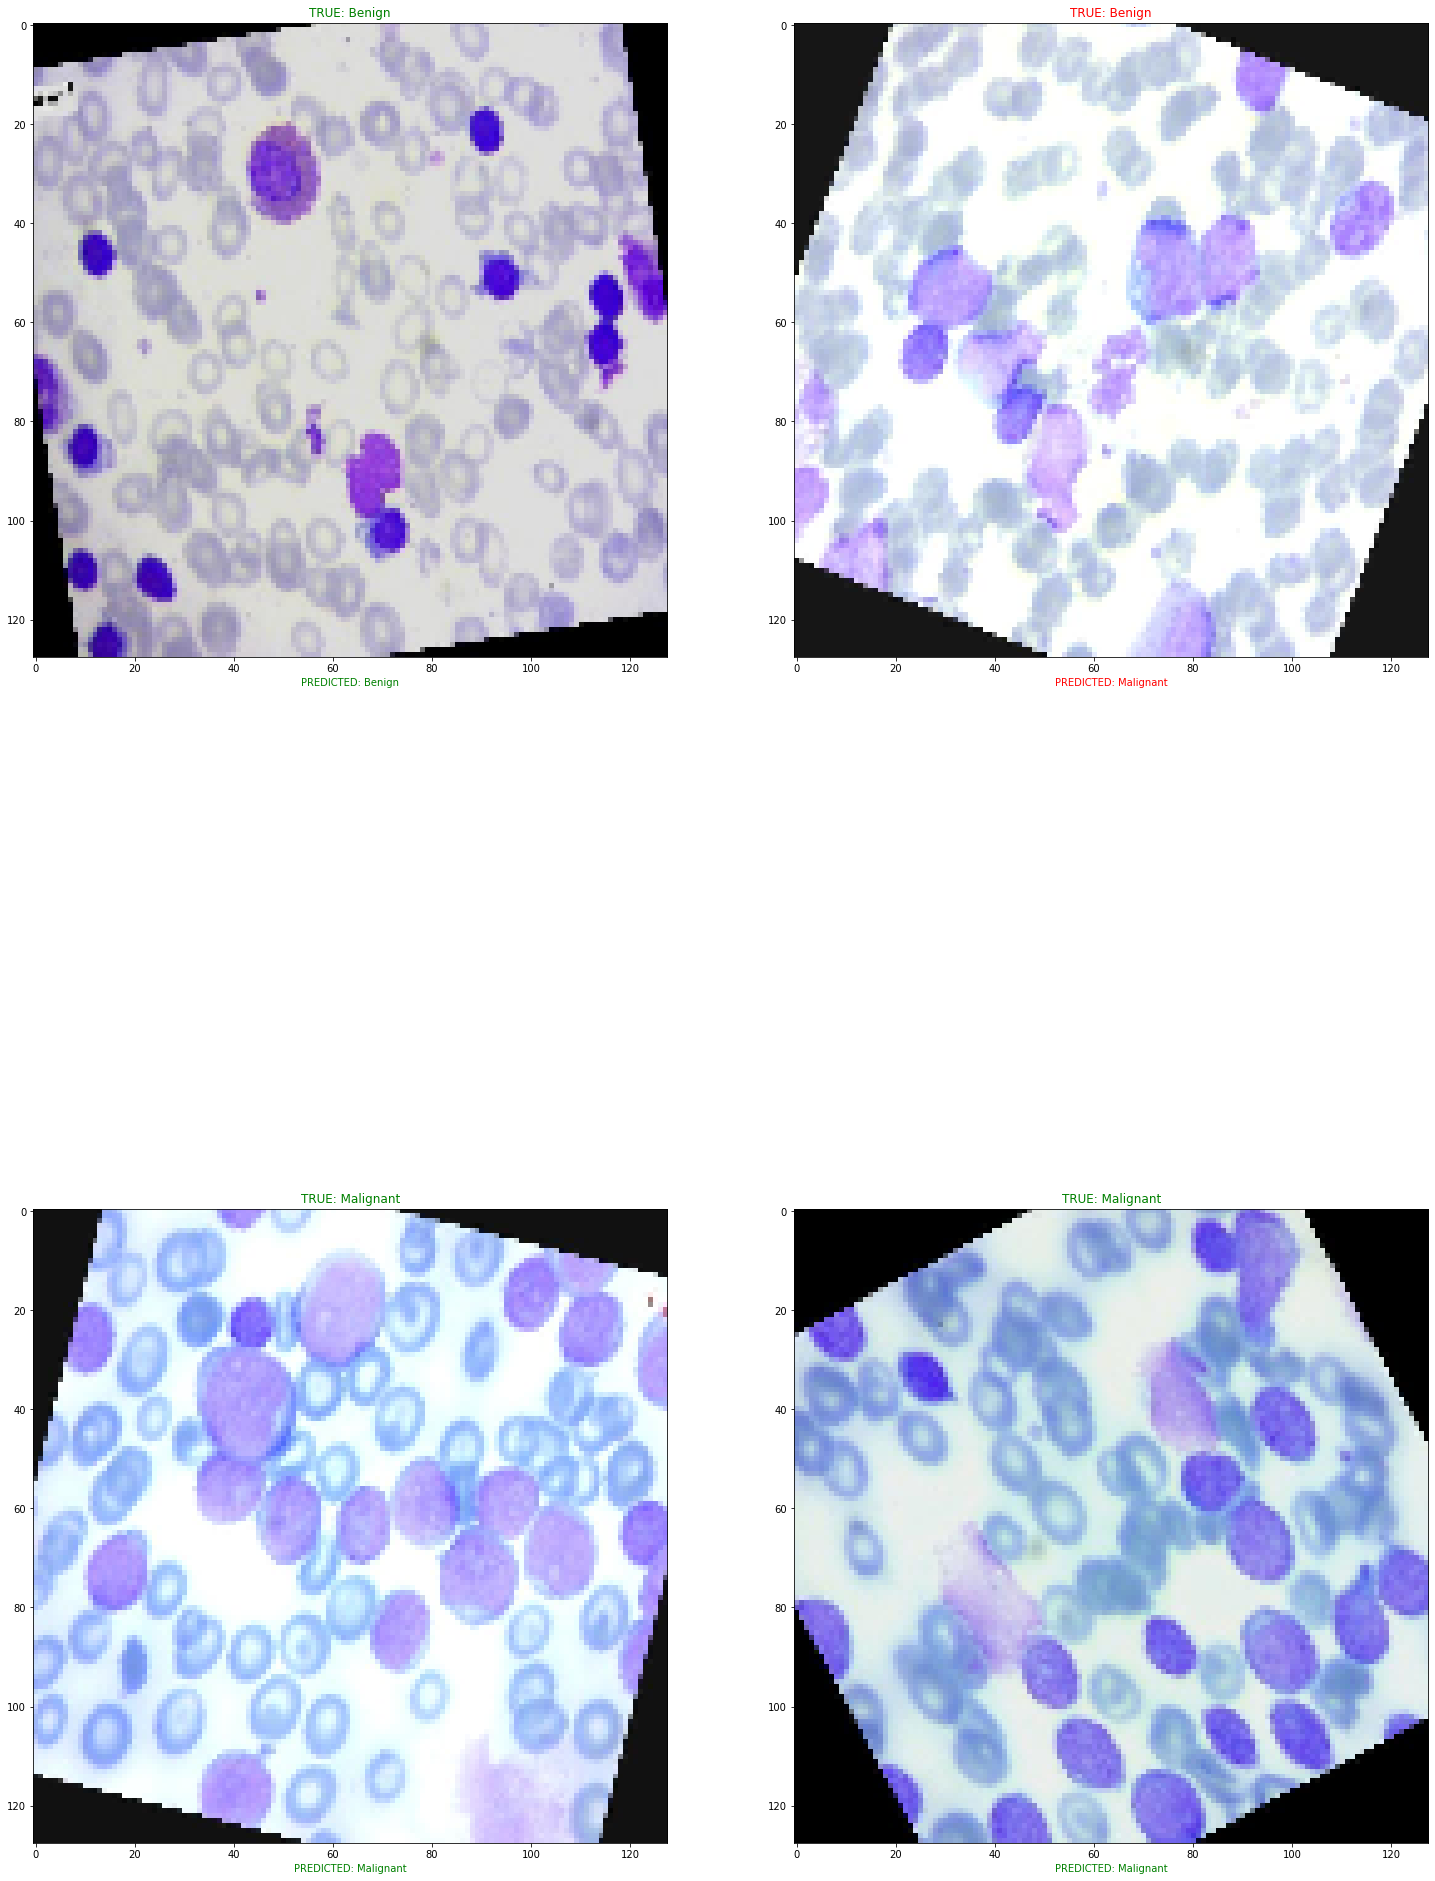

In [11]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(2,2, figsize=(25, 40))

for i in range(2):
    for j in range(2):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [12]:
cnn_predict = model.predict(X_test)

42/42 [==============================] - 12s 281ms/step


In [13]:
cnn_predict

array([[0.07254588, 0.9274541 ],
       [0.17082247, 0.8291775 ],
       [0.98132193, 0.01867806],
       ...,
       [0.30911997, 0.69088006],
       [0.10370101, 0.89629894],
       [0.25485992, 0.7451401 ]], dtype=float32)

In [14]:
predicted_labels = np.argmax(cnn_predict, axis=1)

In [15]:
predicted_labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
y_test=np.argmax(y_test,axis=1)

In [17]:
y_test

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
np.mean(y_test==predicted_labels)

0.9082638362395754

# jaccard_index

In [19]:
def jaccard_index(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union
print(jaccard_index(y_test,predicted_labels))

0.8965811965811966


# average_error_rate

In [20]:
def average_error_rate(y_true, y_pred):
    num_errors = np.sum(y_true != y_pred)
    total_samples = len(y_true)
    return num_errors / total_samples
print(average_error_rate(y_test,predicted_labels))

0.09173616376042457


In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# accuracy_score

In [22]:
accuracy_score(y_test,predicted_labels)

0.9082638362395754

# confusion_matrix

In [23]:
confusion_matrix(y_test,predicted_labels)

array([[ 149,   61],
       [  60, 1049]], dtype=int64)

In [24]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       210
           1       0.95      0.95      0.95      1109

    accuracy                           0.91      1319
   macro avg       0.83      0.83      0.83      1319
weighted avg       0.91      0.91      0.91      1319



In [25]:
# Save the trained model
model.save('cnn_trained_model.h5')

C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from keras.models import load_model
test_model = load_model("cnn_trained_model.h5")

In [27]:
test_model_predict = test_model.predict(X_test)
test_model_predicted_labels = np.argmax(test_model_predict, axis=1)

42/42 [==============================] - 12s 273ms/step


In [28]:
test_model_predicted_labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
np.mean(y_test==test_model_predicted_labels)

0.9082638362395754

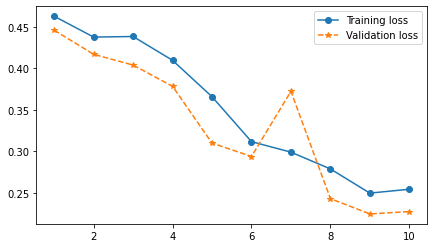

In [30]:
plt.figure(figsize=(7, 4))
ax = plt.axes()
ax.plot(range(1, epochs+1), history.history["loss"], marker="o", label="Training loss")
ax.plot(range(1, epochs+1), history.history["val_loss"], marker="*", ls="--", label="Validation loss")
ax.legend()
plt.show()

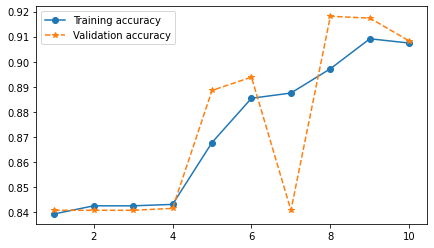

In [31]:
plt.figure(figsize=(7, 4))
ax = plt.axes()
ax.plot(range(1, epochs+1), history.history["accuracy"], marker="o", label="Training accuracy")
ax.plot(range(1, epochs+1), history.history["val_accuracy"], marker="*", ls="--", label="Validation accuracy")
ax.legend()
plt.show()

# VGG19

In [72]:
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

In [81]:
img_height = 224
img_width = 224

In [82]:
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [83]:
from keras.layers import Flatten, Dense, Input
from keras.models import Model

In [84]:
input_layer = Input(shape=(224, 224, 3), name='input')

In [85]:
# Pass input through the base VGG19 model
vgg_model = base_model(input_layer)

# Flatten the output of the VGG19 model
X = Flatten()(vgg_model)

# Add additional layers for classification
output = Dense(1, activation="sigmoid", name="breast_cancer")(X)

# Create the new model
model_2 = Model(inputs=input_layer, outputs=output)

# Display model summary
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 breast_cancer (Dense)       (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [86]:
optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()

model_2.compile(optimizer=optim, loss=loss, metrics=["accuracy"])

In [90]:
history = model_2.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node model_5/breast_cancer/BiasAdd defined at (most recent call last):
  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code

  File "C:\Users\Revanth teja\AppData\Local\Temp\ipykernel_16436\4081407825.py", line 1, in <cell line: 1>

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2913, in fit_generator

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py", line 252, in call

Matrix size-incompatible: In[0]: [32,8192], In[1]: [25088,1]
	 [[{{node model_5/breast_cancer/BiasAdd}}]] [Op:__inference_train_function_25244]

In [88]:
history = model_2.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              callbacks=[early_stopping],
                              verbose = 1)

Epoch 1/5


C:\Users\Revanth teja\AppData\Local\Temp\ipykernel_16436\4081407825.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_2.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


InvalidArgumentError: Graph execution error:

Detected at node model_5/breast_cancer/BiasAdd defined at (most recent call last):
  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code

  File "C:\Users\Revanth teja\AppData\Local\Temp\ipykernel_16436\4081407825.py", line 1, in <cell line: 1>

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2913, in fit_generator

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Revanth teja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py", line 252, in call

Matrix size-incompatible: In[0]: [32,8192], In[1]: [25088,1]
	 [[{{node model_5/breast_cancer/BiasAdd}}]] [Op:__inference_train_function_25244]